<a href="https://colab.research.google.com/github/tarekhdr/Story/blob/master/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POST
0,7/1/2008 0:00,c#,3
1,8/1/2008 0:00,assembly,8
2,8/1/2008 0:00,c,83
3,8/1/2008 0:00,c#,506
4,8/1/2008 0:00,c++,164


In [ ]:
df.tail()

,DATE,TAG,POST
2309,6/1/2022 0:00,php,4205
2310,6/1/2022 0:00,python,23509
2311,6/1/2022 0:00,r,4582
2312,6/1/2022 0:00,ruby,496
2313,6/1/2022 0:00,swift,1901


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2314, 3)

In [ ]:
df.size

6942

In [ ]:
df.ndim

2

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE    2314
TAG     2314
POST    2314
dtype: int64

In [ ]:
df['DATE'].value_counts(dropna=True)

7/1/2015 0:00     14
5/1/2017 0:00     14
7/1/2017 0:00     14
8/1/2017 0:00     14
9/1/2017 0:00     14
                  ..
12/1/2008 0:00    12
11/1/2008 0:00    12
8/1/2008 0:00     11
10/1/2008 0:00    11
7/1/2008 0:00      1
Name: DATE, Length: 168, dtype: int64

In [ ]:
df['TAG'].value_counts(dropna=True)

c#            168
assembly      167
c             167
c++           167
delphi        167
java          167
javascript    167
perl          167
php           167
python        167
ruby          167
r             165
swift         159
go            152
Name: TAG, dtype: int64

In [ ]:
df['POST'].value_counts(dropna=True)

1        14
4        10
3         9
2         9
5         9
         ..
2774      1
270       1
2679      1
2584      1
23509     1
Name: POST, Length: 1867, dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
language_highest_total_num_posts = df.groupby('TAG')[['POST']].sum()
language_highest_total_num_posts = language_highest_total_num_posts.sort_values('POST', ascending=False)
language_highest_total_num_posts

,POST
TAG,
javascript,2389176
python,1971598
java,1850689
c#,1544039
php,1437680
c++,768265
r,453704
c,381341
swift,314544


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
import datetime as dt

In [ ]:
df['DATE'] = df['DATE'].dt.strftime('%B-%Y')

In [ ]:
df

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164
...,...,...,...
2309,2022-06-01,php,4205
2310,2022-06-01,python,23509
2311,2022-06-01,r,4582
2312,2022-06-01,ruby,496


In [ ]:
df.insert(2, 'year', pd.to_datetime(df['DATE']).dt.year)

In [ ]:
df

,DATE,TAG,year,POST
0,July-2008,c#,2008,3
1,August-2008,assembly,2008,8
2,August-2008,c,2008,83
3,August-2008,c#,2008,506
4,August-2008,c++,2008,164
...,...,...,...,...
2309,June-2022,php,2022,4205
2310,June-2022,python,2022,23509
2311,June-2022,r,2022,4582
2312,June-2022,ruby,2022,496


In [ ]:
python_df = df[df['TAG'] == 'python']

In [ ]:
python_df

,DATE,TAG,year,POST
10,August-2008,python,2008,120
21,September-2008,python,2008,537
33,October-2008,python,2008,508
44,November-2008,python,2008,452
56,December-2008,python,2008,439
...,...,...,...,...
2254,February-2022,python,2022,22614
2268,March-2022,python,2022,24565
2282,April-2022,python,2022,23640
2296,May-2022,python,2022,23263


In [ ]:
python_df.groupby(['TAG', 'year']).sum()

POST
TAG    year        
python 2008    2056
       2009   12855
       2010   26997
       2011   42110
       2012   64144
       2013   96149
       2014  116053
       2015  136912
       2016  158123
       2017  191651
       2018  205265
       2019  224021
       2020  285365
       2021  269746
       2022  140151

In [ ]:
java_df = df[df['TAG'] == 'java']

In [ ]:
java_df

,DATE,TAG,year,POST
6,August-2008,java,2008,222
17,September-2008,java,2008,1133
29,October-2008,java,2008,1150
40,November-2008,java,2008,957
52,December-2008,java,2008,827
...,...,...,...,...
2250,February-2022,java,2022,7268
2264,March-2022,java,2022,8110
2278,April-2022,java,2022,7866
2292,May-2022,java,2022,7910


In [ ]:
java_df.groupby(['TAG', 'year']).sum()

POST
TAG  year        
java 2008    4289
     2009   23897
     2010   54311
     2011   98847
     2012  144467
     2013  190122
     2014  216597
     2015  214917
     2016  196440
     2017  174138
     2018  145105
     2019  126071
     2020  120578
     2021   94596
     2022   46314

No handles with labels found to put in legend.


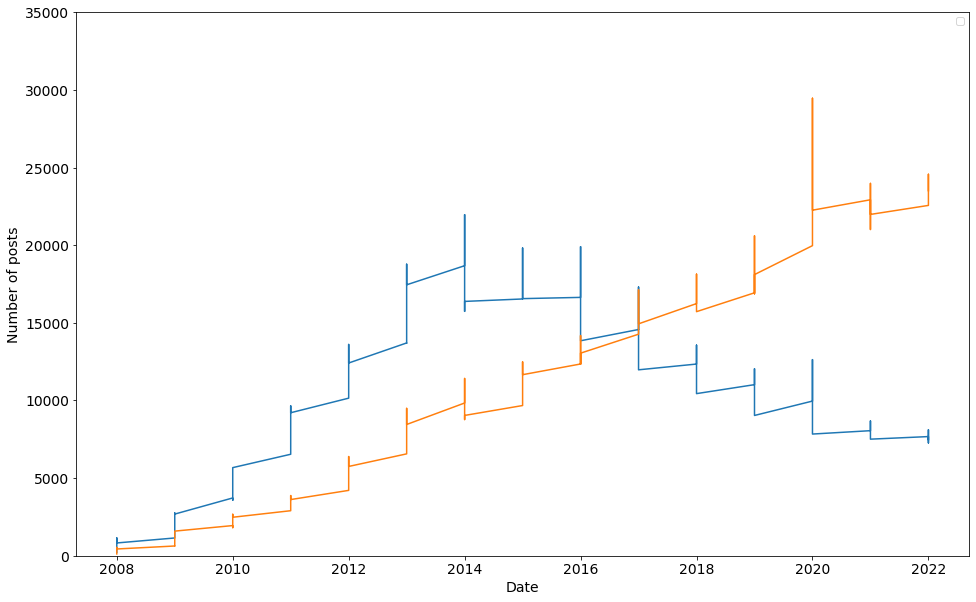

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(java_df['year'], java_df['POST'])
plt.plot(python_df['year'], python_df['POST'])
plt.legend()
plt.show()

In [ ]:
languages_year_popularity = df.groupby(['TAG','year']).sum()

In [ ]:
languages_year_popularity

POST
TAG      year       
assembly 2008     85
         2009    586
         2010   1329
         2011   2034
         2012   2864
...              ...
swift    2018  40953
         2019  34577
         2020  33579
         2021  24228
         2022  11380

[208 rows x 1 columns]

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%B-%Y')

In [ ]:
df['DATE'] = df['DATE'].dt.strftime('%B-%Y')

In [ ]:
languages_monthly_posts = df.groupby(['DATE', 'TAG']).nunique()
languages_monthly_posts.sort_values(by='DATE', ascending=True)
languages_monthly_posts

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
entries_count_df = df.groupby('TAG').count()
entries_count_df.sort_values('POST', ascending=True)

,DATE,POST
TAG,,
go,152,152
swift,159,159
r,165,165
assembly,167,167
c,167,167
c++,167,167
delphi,167,167
java,167,167
javascript,167,167


In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POST')

In [ ]:
reshaped_df.fillna(0, inplace=True)

In [ ]:
reshaped_df.isna().values.any()

False

In [ ]:
reshaped_df.shape

(168, 14)

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1150.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,581.0,97.0,502.0,452.0,1.0,159.0,0.0


In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-02-01,225.0,1788.0,5824.0,3478.0,188.0,688.0,7268.0,15440.0,97.0,3718.0,22614.0,4338.0,456.0,1879.0
2022-03-01,253.0,2101.0,6477.0,3842.0,134.0,830.0,8110.0,16350.0,105.0,3768.0,24565.0,5085.0,528.0,2076.0
2022-04-01,265.0,1874.0,5955.0,3860.0,122.0,757.0,7866.0,16023.0,101.0,3825.0,23640.0,4780.0,494.0,1775.0
2022-05-01,290.0,1922.0,6328.0,3927.0,129.0,681.0,7910.0,16175.0,94.0,4044.0,23263.0,4858.0,502.0,1768.0
2022-06-01,262.0,1742.0,6406.0,3627.0,130.0,797.0,7484.0,16081.0,130.0,4205.0,23509.0,4582.0,496.0,1901.0


In [ ]:
for col in reshaped_df.columns:
  print(col)

assembly
c
c#
c++
delphi
go
java
javascript
perl
php
python
r
ruby
swift


In [ ]:
reshaped_df.count()

TAG
assembly      168
c             168
c#            168
c++           168
delphi        168
go            168
java          168
javascript    168
perl          168
php           168
python        168
r             168
ruby          168
swift         168
dtype: int64

## Data Visualisaton with with Matplotlib


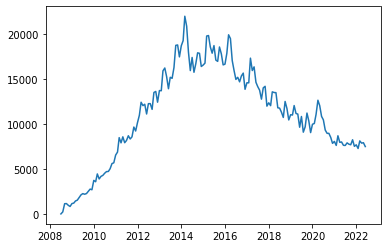

In [ ]:
plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

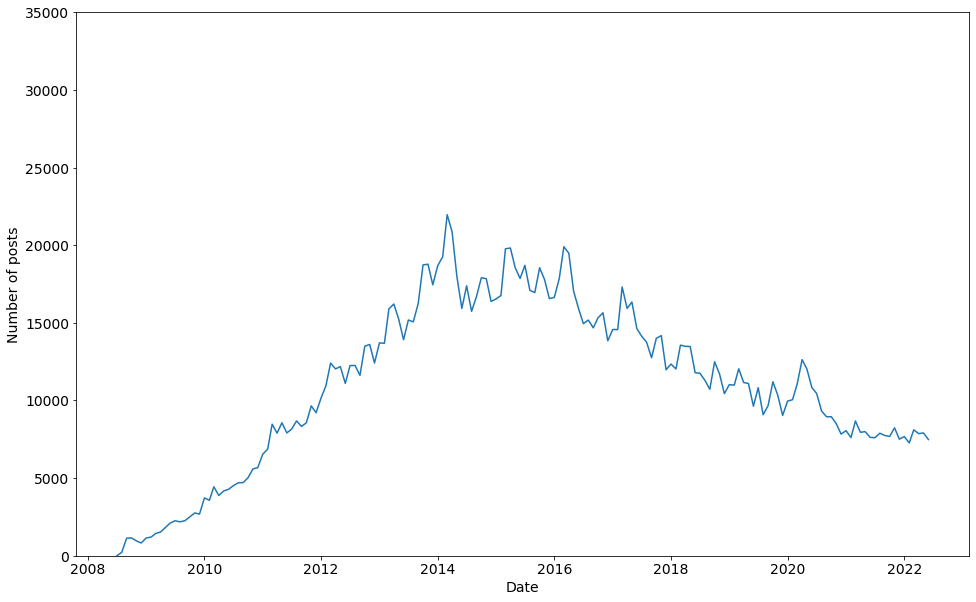

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

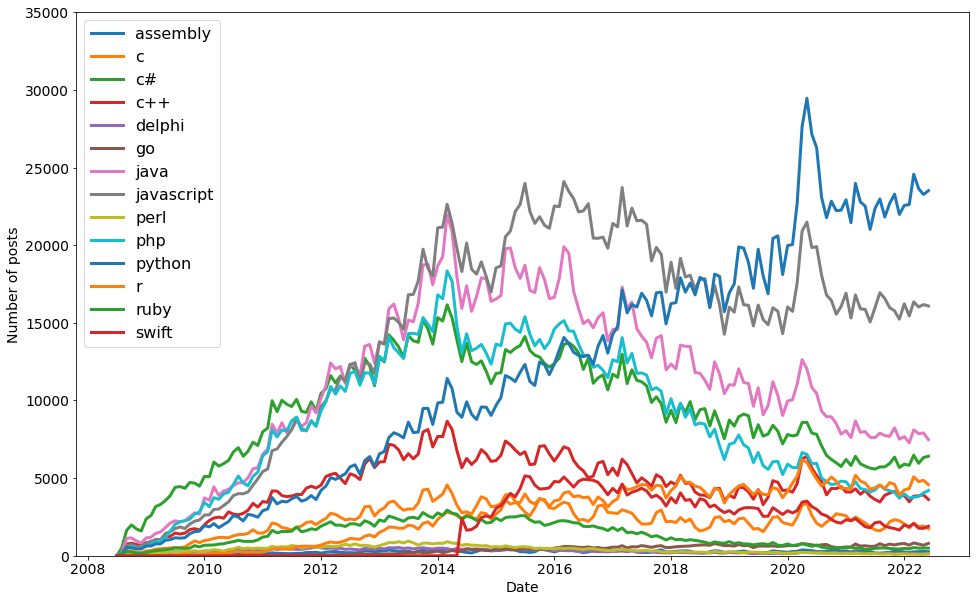

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

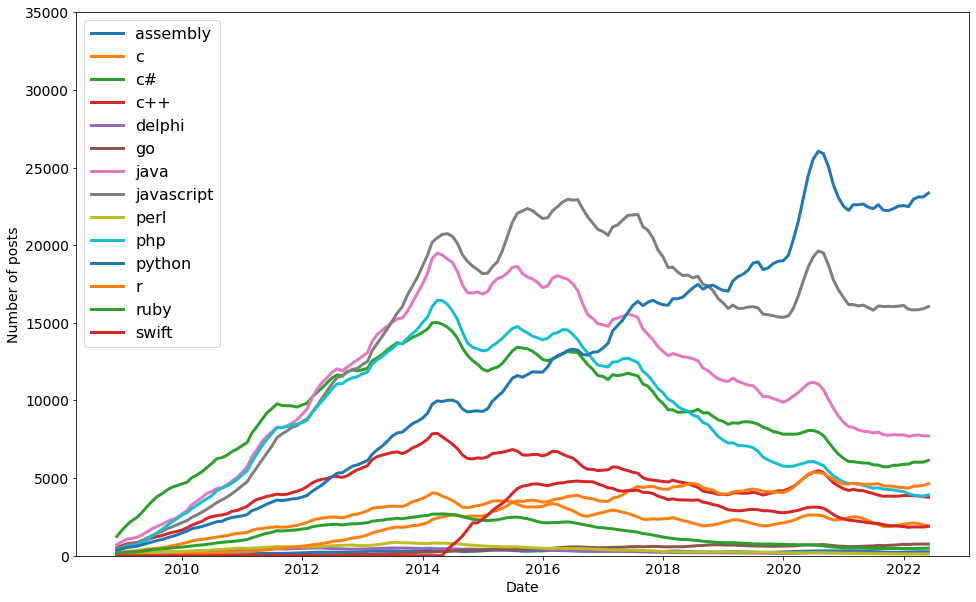

In [ ]:
rolling_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
for column in rolling_df.columns:
  plt.plot(rolling_df.index, rolling_df[column], linewidth=3, label=rolling_df[column].name)
plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

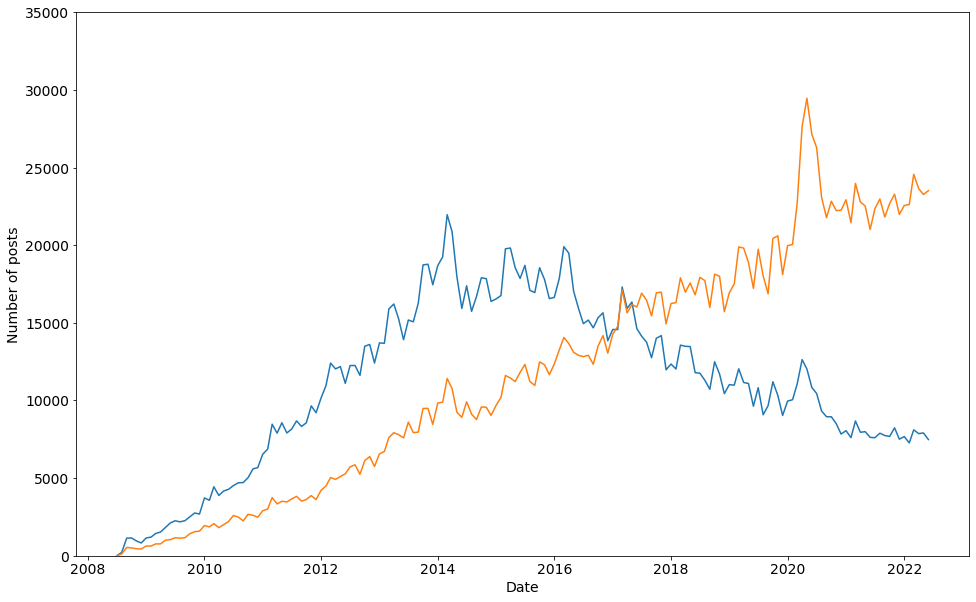

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

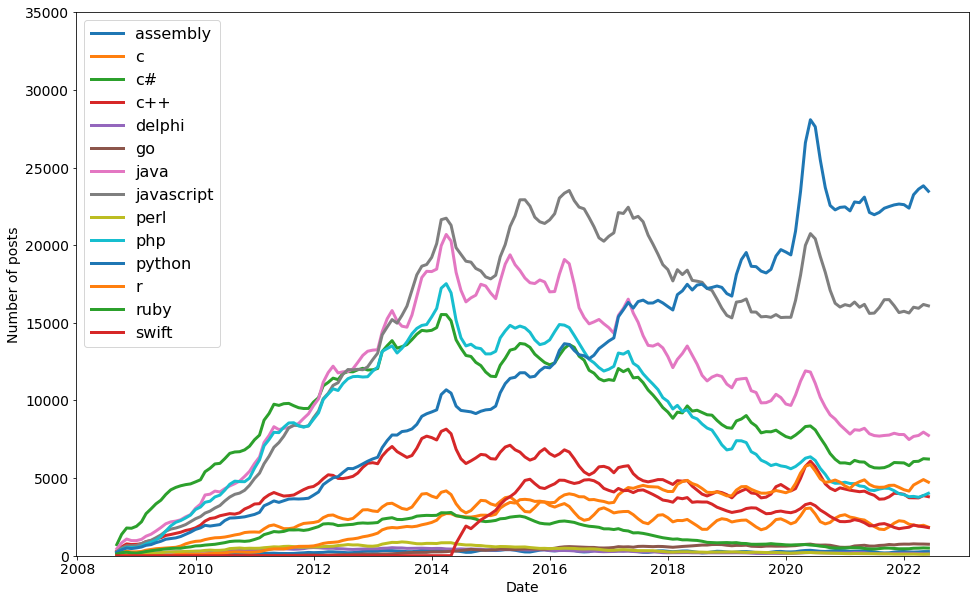

In [ ]:
rolling_df = reshaped_df.rolling(window=3).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
for column in rolling_df.columns:
  plt.plot(rolling_df.index, rolling_df[column], linewidth=3, label=rolling_df[column].name)
plt.legend(fontsize=16)

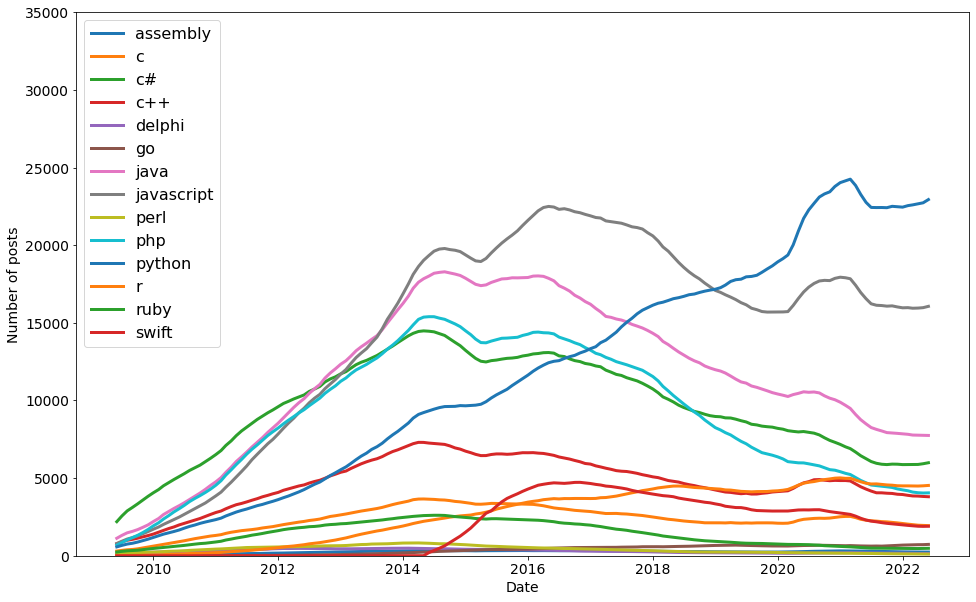

In [ ]:
rolling_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
for column in rolling_df.columns:
  plt.plot(rolling_df.index, rolling_df[column], linewidth=3, label=rolling_df[column].name)
plt.legend(fontsize=16)